# State Machines
This notebook accompanies the 3rd project in the Graph Theory section of the book "Programming Applied Mathematics for Security".

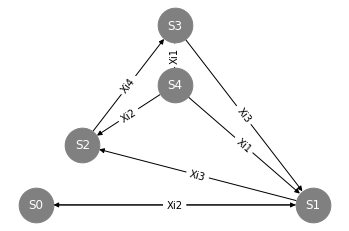

In [8]:
import networkx as nx
from matplotlib import pyplot as plt
from random import choice
from mpl_toolkits import mplot3d
from colour import Color

%matplotlib inline

fig, ax1 = plt.subplots()

G = nx.DiGraph()
G.add_edge("S0", "S1", label="Xi1")
G.add_edge("S1", "S0", label="Xi2")
G.add_edge("S1", "S2", label="Xi3")
G.add_edge("S2", "S3", label="Xi4")
G.add_edge("S3", "S1", label="Xi3")
G.add_edge("S3", "S4", label="Xi3")
G.add_edge("S4", "S3", label="Xi1")
G.add_edge("S4", "S2", label="Xi2")
G.add_edge("S4", "S1", label="Xi1")
pos = nx.planar_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1200, ax=ax1, node_color="gray")
nx.draw_networkx_edges(G, pos, node_size=1200, ax=ax1)
node_labels = {k: k for k in G.nodes.keys()}
edge_labels = {(u,v): d["label"] for u,v,d in G.edges(data=True)}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color="w")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
#for n in G.nodes.keys():
#    plt.text(pos[n][0]-0.024,pos[n][1], s=n ,color="w")

ax1.axis('off')
plt.savefig("Figure_6-1.svg", format="svg")
plt.savefig("Figure_6-1.png")
plt.show()

# Random Walk
The random walk described in the project notes is managed using the code below. The functions up, down, left, and right corresponde to the input alphabet <span>&Xi;</span>

In [9]:
def up(state):
    return (state[0], state[1] + 1)
        
def down(state):
    return (state[0], state[1] - 1)
        
def left(state):
    return (state[0] - 1, state[1])
        
def right(state):
    return (state[0] + 1, state[1])
        
def valid_actions(state):
    actions = {}
    if (state[1] + 1) <= 8:
        actions["up"] = up
    if (state[1] - 1) >= 1:
        actions["down"] = down
    if (state[0] + 1) <= 8:
        actions["right"] = right
    if (state[0] - 1) >= 1:
        actions["left"] = left
    return actions

This is a uniformly random, deterministic implementation of the FSM. 

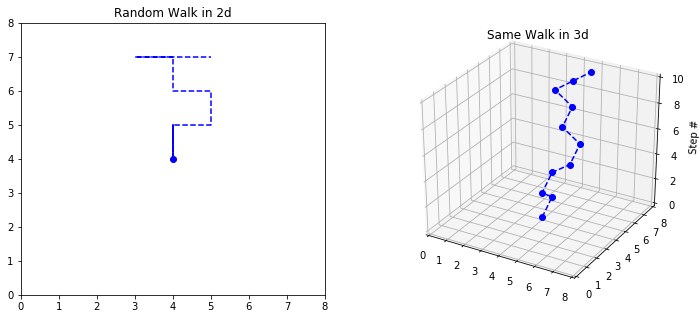

In [3]:
current_state = (4,4)
transitions = []
states = [current_state]
n = 10
for i in range(n):
    actions_available = valid_actions(current_state)
    action_key = choice([k for k in actions_available])
    action = actions_available[action_key]
    current_state = action(current_state)
    transitions.append(action_key)
    states.append(current_state)

x = [s[0] for s in states]
y = [s[1] for s in states]
z = range(len(states))
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax1.plot(x, y, "--ob", markevery=[0])
ax1.set_xlim((0, 8))
ax1.set_ylim((0, 8))
ax2 = fig.add_subplot(122,projection="3d")
ax2.plot(x, y, z, "--ob")
ax2.set_zlabel("Step #")
ax2.set_xlim((0, 8))
ax2.set_ylim((0, 8))
ax1.set_title("Random Walk in 2d")
ax2.set_title("Same Walk in 3d")
#plt.savefig("Figure_6-2.svg", format="svg")
#plt.savefig("Figure_6-2.png")
plt.show()

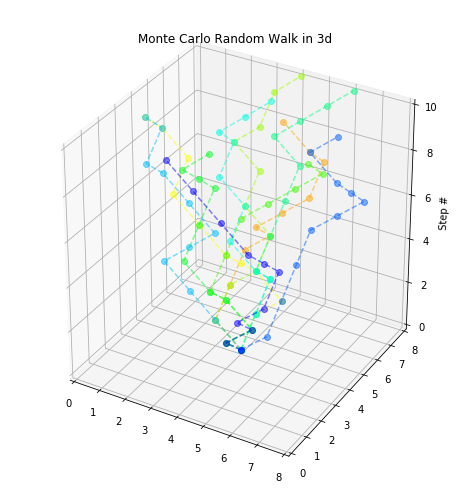

In [12]:
lines = []
blue = Color("blue")
colors = list(blue.range_to(Color("orange"), 10))
colors = [c.rgb for c in colors]
for i in range(10):
    current_state = (4,4)
    transitions = []
    states = [current_state]
    n = 10
    for i in range(n):
        actions_available = valid_actions(current_state)
        action_key = choice([k for k in actions_available])
        action = actions_available[action_key]
        current_state = action(current_state)
        transitions.append(action_key)
        states.append(current_state)

    x = [s[0] for s in states]
    y = [s[1] for s in states]
    z = range(len(states))
    lines.append((x, y, z))
fig = plt.figure(figsize=(13,7))
ax1 = fig.add_subplot(121, projection="3d")
for x,y,z in lines:
    ax1.plot(x, y, z, "--o", color=colors.pop(), alpha=0.5)
ax1.set_zlabel("Step #")
ax1.set_xlim((0, 8))
ax1.set_ylim((0, 8))
ax1.set_title("Monte Carlo Random Walk in 3d")
plt.savefig("Figure_6-3.svg", format="svg")
plt.savefig("Figure_6-3.png")
plt.tight_layout()
plt.show()